# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
tf.config.list_physical_devices('GPU')
print('Is using GPU?', tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


TensorFlow version: 2.12.0
Is using GPU? False


# Task 2: Preprocess Data

In [2]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data() # Original dataset contains 60000 samples
x_train , y_train = get_three_classes(x_train , y_train) # Get only first three classes
x_test , y_test = get_three_classes(x_test , y_test)

## (total samples,height,width,channels) (samples,classes)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

170498071/170498071 [==============================] - 12s 0us/step
(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Task 3: Visualize Examples

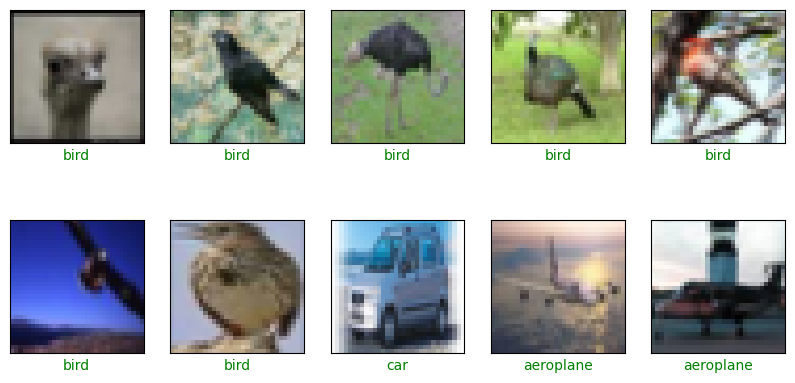

In [12]:
class_names = ['aeroplane', 'car', 'bird']
# Class id = 1 , aeroplane
# Class id = 2 , car
# Class id = 3 , bird 

def show_examples(x,y,p):
  indices = np.random.choice(range(x.shape[0]),10,replace=False ) ## for unique values

  x=x[indices]
  y=y[indices]
  p=p[indices]

  plt.figure(figsize=(10,5))
  for i in range(10):
    plt.subplot(2,5,1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col = "green" if np.argmax(y[i]) == np.argmax(p[i]) else "red"
    plt.xlabel(class_names[np.argmax(p[i])], color=col)
  plt.show()

show_examples(x_train,y_train,y_train)

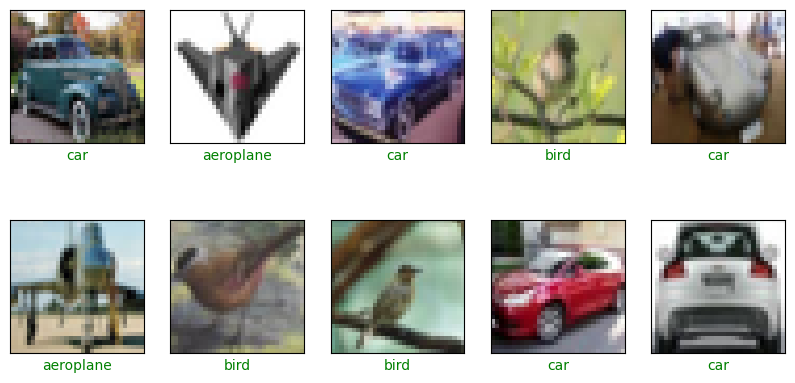

In [13]:
show_examples(x_test,y_test,y_test)

# Task 4: Create Model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

# Task 5: Train the Model

# Task 6: Final Predictions